# Tracing amphipods in the Bay of Biscay

We use the parcels package with surface currents from the Copernicus forecast (CMEMS) to evolve particles backwards in time from beaches in Northern Spain. where huge numbers of amphipods washed up on 17th November 2018.

Longitude and latitude where amphipod were found

| Location  | Longitude | Latitude |
|-----------|-----------|----------|
|Verdiciu   | -5.8772   | 43.6260  |  
|Xagó	    | -5.9202   | 43.6041  |  
|Salinas    | -5.9588   | 43.5790  |  
|Bañugues   | -5.8093   | 43.6317  |  
|Luanco	    | -5.7875   | 43.6184  |  
|San Lorenzo| -5.6539   | 43.5426  |  
|Arnao      | -7.0220   | 43.5488  |  
|Penarronda | -6.9968   | 43.5536  |  
|Santa Gadea| -6.9878   | 43.5556  |  
|Mexota     | -6.9770   | 43.5564  |  
|Serantes   | -6.9749   | 43.5557  |  
|Tapia      | -6.9496   | 43.5666  |  
|Represas   | -6.9378   | 43.5704  |  
|Gaviero    | -6.2954   | 43.5667  |  
|L'Airin    | -6.2836   | 43.5714  | 
|Salencia   | -6.2789   | 43.5727  |  
|Gancéu	    | -6.2698   | 43.5766  |  
|San Pedro  | -6.2210   | 43.5794  |  
|Penarronda | -6.9946   | 43.5534  |  
|Tapia	    | -6.9487   | 43.5679  |  
|Frexulfe   | -6.6782   | 43.5592  |  
|Caroya	    | -6.4734   | 43.5506  |  
|San Pedro  | -6.2210   | 43.5794  | 
|Quebrantos | -6.0653   | 43.5653  |  

In [1]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, plotTrajectoriesFile
import numpy as np
import math
from datetime import timedelta, datetime
from operator import attrgetter

In [2]:
# Load in the data
filenames = {'U': "/work/gam/IBI_ANALYSIS_FORECAST_PHYS_005_001/IBI_subdomain_*_hourly.nc",
             'V': "/work/gam/IBI_ANALYSIS_FORECAST_PHYS_005_001/IBI_subdomain_*_hourly.nc"}
variables = {'U': 'uo',
             'V': 'vo'}
dimensions = {'lat': 'latitude',
              'lon': 'longitude',
              'time': 'time'}
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions);

In [3]:
# Handle out of bounds errors (taken from parcels_examples/tutorial_Aghulasparticles)
def DeleteParticle(particle, fieldset, time, dt):
    particle.delete()

/nbhome/gam/miniconda/envs/py2_parcels/lib/python2.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


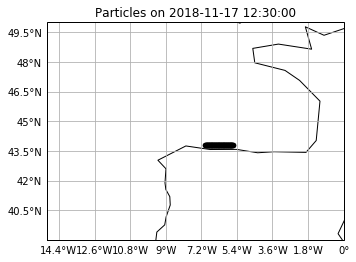

In [4]:
# Define particle set
pset = ParticleSet.from_line(fieldset=fieldset, pclass=JITParticle,
                             size=100,           # releasing N particles
                             start=(-7, 43.8),   # releasing on a line: the start longitude and latitude
                             finish=(-5.6, 43.8),  # releasing on a line: the end longitude and latitude
                             time=datetime(2018, 11, 17, 12, 30))  # releasing at a certain time
pset.show()

In [5]:
# Calculate trajectories
pset.execute(AdvectionRK4,
             runtime=timedelta(days=27),
             dt=-timedelta(minutes=5),
             output_file=pset.ParticleFile(name="amphipod_test.nc", outputdt=timedelta(hours=1)));

INFO: Compiled JITParticleAdvectionRK4 ==> /tmp/parcels-20354/77dafa5b1a01dbebc862457695968981.so
100% (2332800.0 of 2332800.0) |##########| Elapsed Time: 0:03:06 Time:  0:03:06


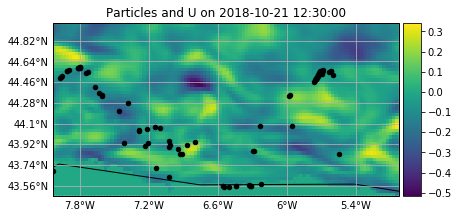

In [8]:
pset.show(domain=[45,43.5,-5,-8], field=fieldset.U)

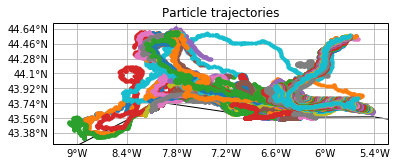

In [7]:
ax=plotTrajectoriesFile('amphipod_test.nc');